# **1- filter methods**


filter feature by a filter you give, ex: low varience

In [49]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest, f_classif

x,y = load_iris(return_X_y = True)


In [50]:
chi2(x,y)
# first one for ranking, best one  116.31261309, then: 67.0483602
# second one for num between 0,1

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [51]:
f_classif(x,y)
#different ranks, but same order of importance

(array([ 119.26450218,   49.16004009, 1180.16118225,  960.0071468 ]),
 array([1.66966919e-31, 4.49201713e-17, 2.85677661e-91, 4.16944584e-85]))

In [52]:
print (x.shape)
x_new = SelectKBest(chi2, k = 2).fit_transform(x,y)
print(x_new.shape)
x_new2 = SelectKBest(f_classif, k = 3).fit_transform(x,y)
print(x_new2.shape)


(150, 4)
(150, 2)
(150, 3)


# 2- **wrapper methods**

decide the best feature by trying every featuer/combination how it can predict the label [y]  

*   forward - every single feature, then combination of features.
*   backward - all features
*   and recursive [forward + backward]



In [53]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
model = SequentialFeatureSelector(knn, n_features_to_select=2) # i put the feature selection [in it the ml model] - how many feature i want [best 3 combination]
model.fit(x, y)
print(model.get_support())

'''
direction{‘forward’, ‘backward’}, default=’forward’
Whether to perform forward selection or backward selection.
'''

model1 = SequentialFeatureSelector(knn,
                                   direction = 'backward',
                                  n_features_to_select=2) # i put the feature selection [in it the ml model] - how many feature i want [best 3 combination]
model1.fit(x, y)
print(model1.get_support())

[ True False False  True]
[False False  True  True]


In [54]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(x, y)
selector.support_

array([ True, False,  True,  True])

In [55]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

svc = SVR(kernel="linear", C=1)
selector = RFE(svc, n_features_to_select=2, step=1)
selector = selector.fit(x, y)
print(selector.ranking_) # one's is the best
print(selector.support_)

[2 3 1 1]
[False False  True  True]


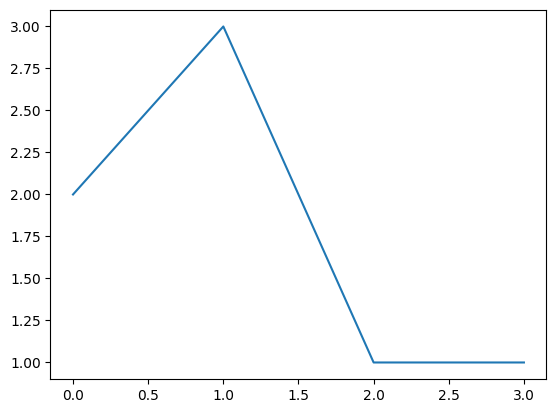

In [56]:
import matplotlib.pyplot as plt

plt.plot([0,1,2,3], selector.ranking_)


# 3- empeded

all the above type of just decide the feautres but this type select the best features then train the model and gives the model.


In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score #for reg

feature_train, feature_test, label_train, label_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf = Lasso(alpha=0.1)
clf.fit(feature_train, label_train)
label_pred = clf.predict(feature_test)

#print(clf.coef_)
#print(clf.intercept_)

acc = r2_score(label_test, label_pred)
acc

0.9063068004974982

In [58]:
from sklearn.linear_model import ElasticNet

modelE = ElasticNet()
modelE.fit(feature_train, label_train)
label_pred2 = modelE.predict(feature_test)

acc = r2_score(label_test, label_pred2)
print(acc)

print(modelE.coef_)
print(modelE.intercept_)

0.7017712571836526
[ 0.         -0.          0.23312122  0.        ]
0.15485273761168072
